눈여겨 봐야 할 것은 커널밀도함수 추정하는 것, 솔직히 100퍼 손으로 구하는 거 낸다 이거.

### 이변량 자료의 분석

`-` 부호 그래프(Symbols graph), 버블 차트

> x와 y의 산점도 상의 개별 자료 점에 각각의 z값의 크기에 비레하는 부호(symbol)를 그림.

In [1]:
library(lattice)
data(trees)
attach(trees)

In [3]:
options(repr.plot.width = 16, repr.plot.height = 9)

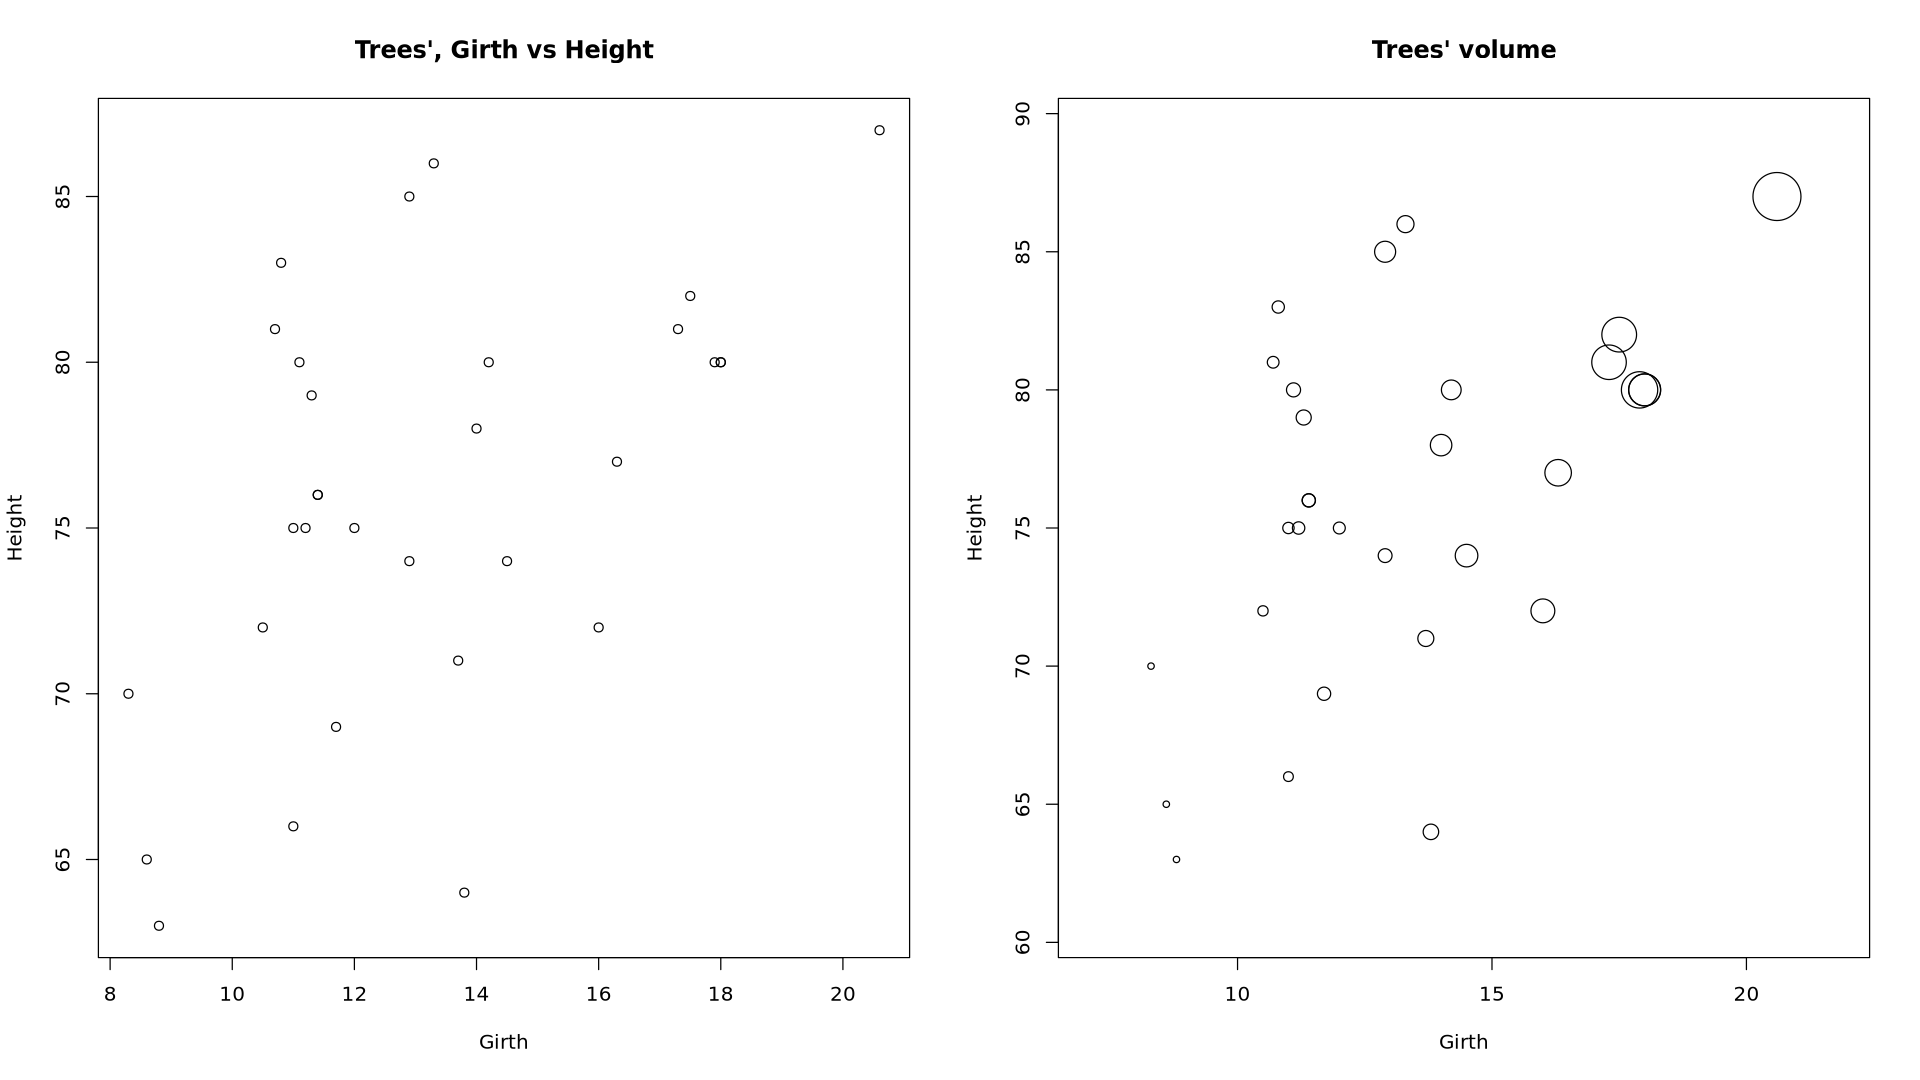

In [4]:
par(mfrow = c(1, 2))
plot(Girth, Height, main = "Trees', Girth vs Height")
symbols(Girth, Height, circles = Volume, inches = 0.2, main = "Trees' volume")

`-` 온도계 그림(thermometer)

> 산점도의 온도계 눈금에 height를 넣음. 이게 뭐임

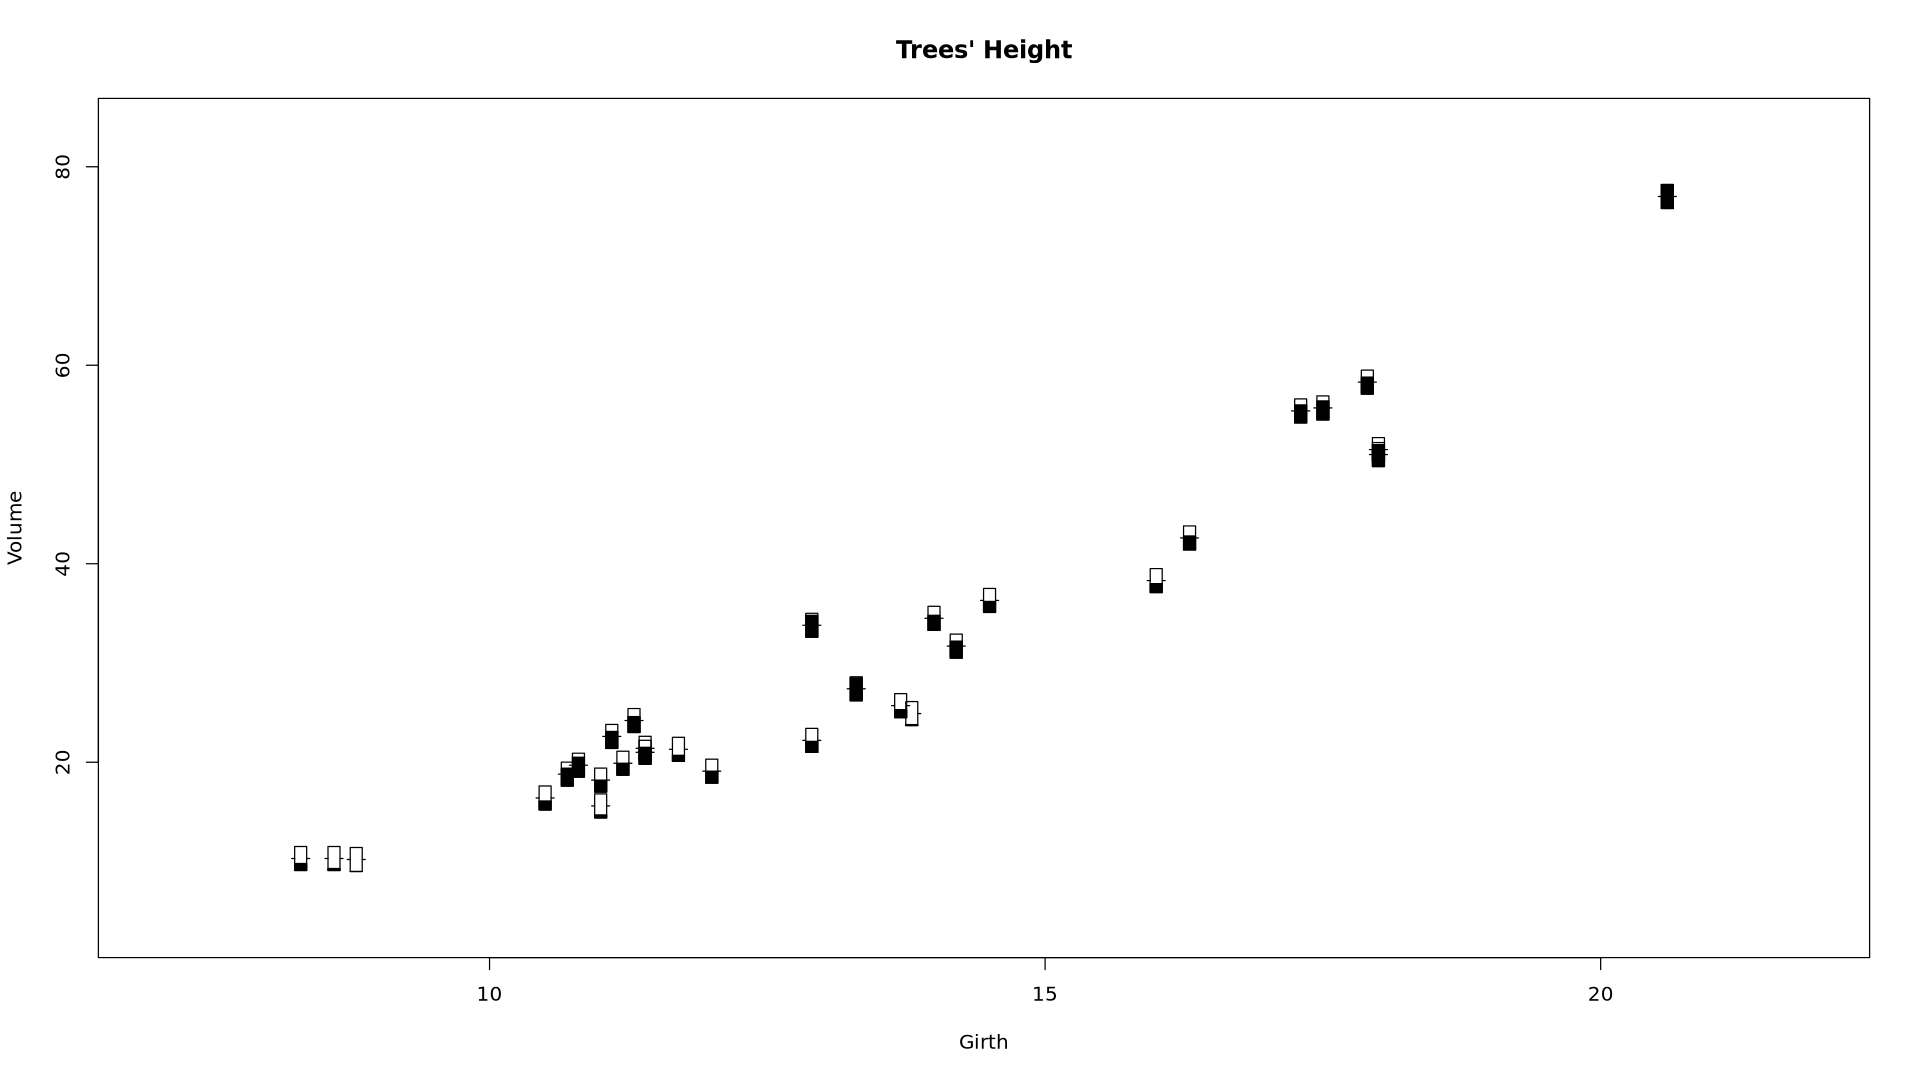

In [6]:
Rel.Height = (Height - min(Height))/(max(Height) - min(Height))
symbols(Girth, Volume, thermometers = cbind(0.5, 1, Rel.Height), inches = 0.2, main = "Trees' Height")

`-` 밀도함수의 추정과 보자기 그림

* 모수적 추정방법 : 미지의 확률밀도함수가 가정한 확률밀도함수의 범주에 속한다고 가정한다.

> 표본자료로부터 표본평균과 표본분산을 구해 정규분포의 공식에 대입.

* 비모수적 추정방법 : 함수 형태를 가정하지 않고 주어진 자료로부터 직접 함수(구체적인 분포가 아닌 함수의 높이를 추정)를 추정(ex : 막대그래프)

$$F(x) = \frac{1}{n} \Sigma_{i = 1}^{n} I(X_i ≤ x)$$

1) 히스토그램에 의한 밀도함수 추정방법

아주 작은 $h$에 대하여,

$$\hat f(x) = \frac{\hat F(x+h) - \hat F(x)}{h} = \frac{1}{nh} \Sigma_{i=1}^{n} I(x < X_i ≤ x + h)$$

> 그리기 쉽지만, 도수분포표의 결과에 따라 모양이 크게 달라진다. 계급의 시작점과 크기(h)에 따라 모양이 크게 달라진다.

2) 커널에 의한 밀도 추정(kernel density estimation)

> 자료의 밀도함수에 대한 특정 형태를 가정하지 않고 밀도에 대한 추정량을 계산
>
> 커널 밀도 추정량의 크기가 크다는 것은 그 근처에 자료가 많이 있다는 것을 의미.
>
> 커널의 종류에 따라 추정량의 모양의 변화는 적으나, 띠 길이에 따라서는 추정량의 변화가 심함.

$$x_1, x_2 \cdots x_n \overset{i.i.d}{\sim} f(x) \to \hat f(x) = \frac1n \Sigma_{i = 1}^{n} \frac1b K(\frac{x - x_i}{b})$$


$$\hat f(x) = \frac{1}{nb} (K(\frac{x - x_1}{b}) + K(\frac{x - x_2}{b}) + \cdots + K(\frac{x - x_n}{b})) = \frac{1}{nb} (\frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_1)^2}{2b^2}} + \frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_2)^2}{2b^2}} + \cdots + \frac{1}{\sqrt{2\pi}}e^{-\frac{(x - x_n)^2}{2b^2}})$$

> 디폴트 값

$$K(z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}, b = 0.9 \times min(s, \frac{IQR}{1.35}) n^{-\frac15}, s : sd(x)$$

여기에서 커널과 띠 넓이는 $K(z) >0, b > 0$

* 커널의 성질

1) 커널의 전체 넓이는 1이다.
2) 커널은 0을 중심으로 대칭이다.

> 커널을 각 데이터에 대한 확률밀도함수라고 생각하면 당연함.

`-` 커널 밀도함수 추정방법

1) 관측된 데이터 각각마다 해당 데이터 값을 중심으로 하는 커널 함수를 생성

$$K(\frac{x - x_i}{b})$$

`-` 히스토그램(density)과 커널의 비교

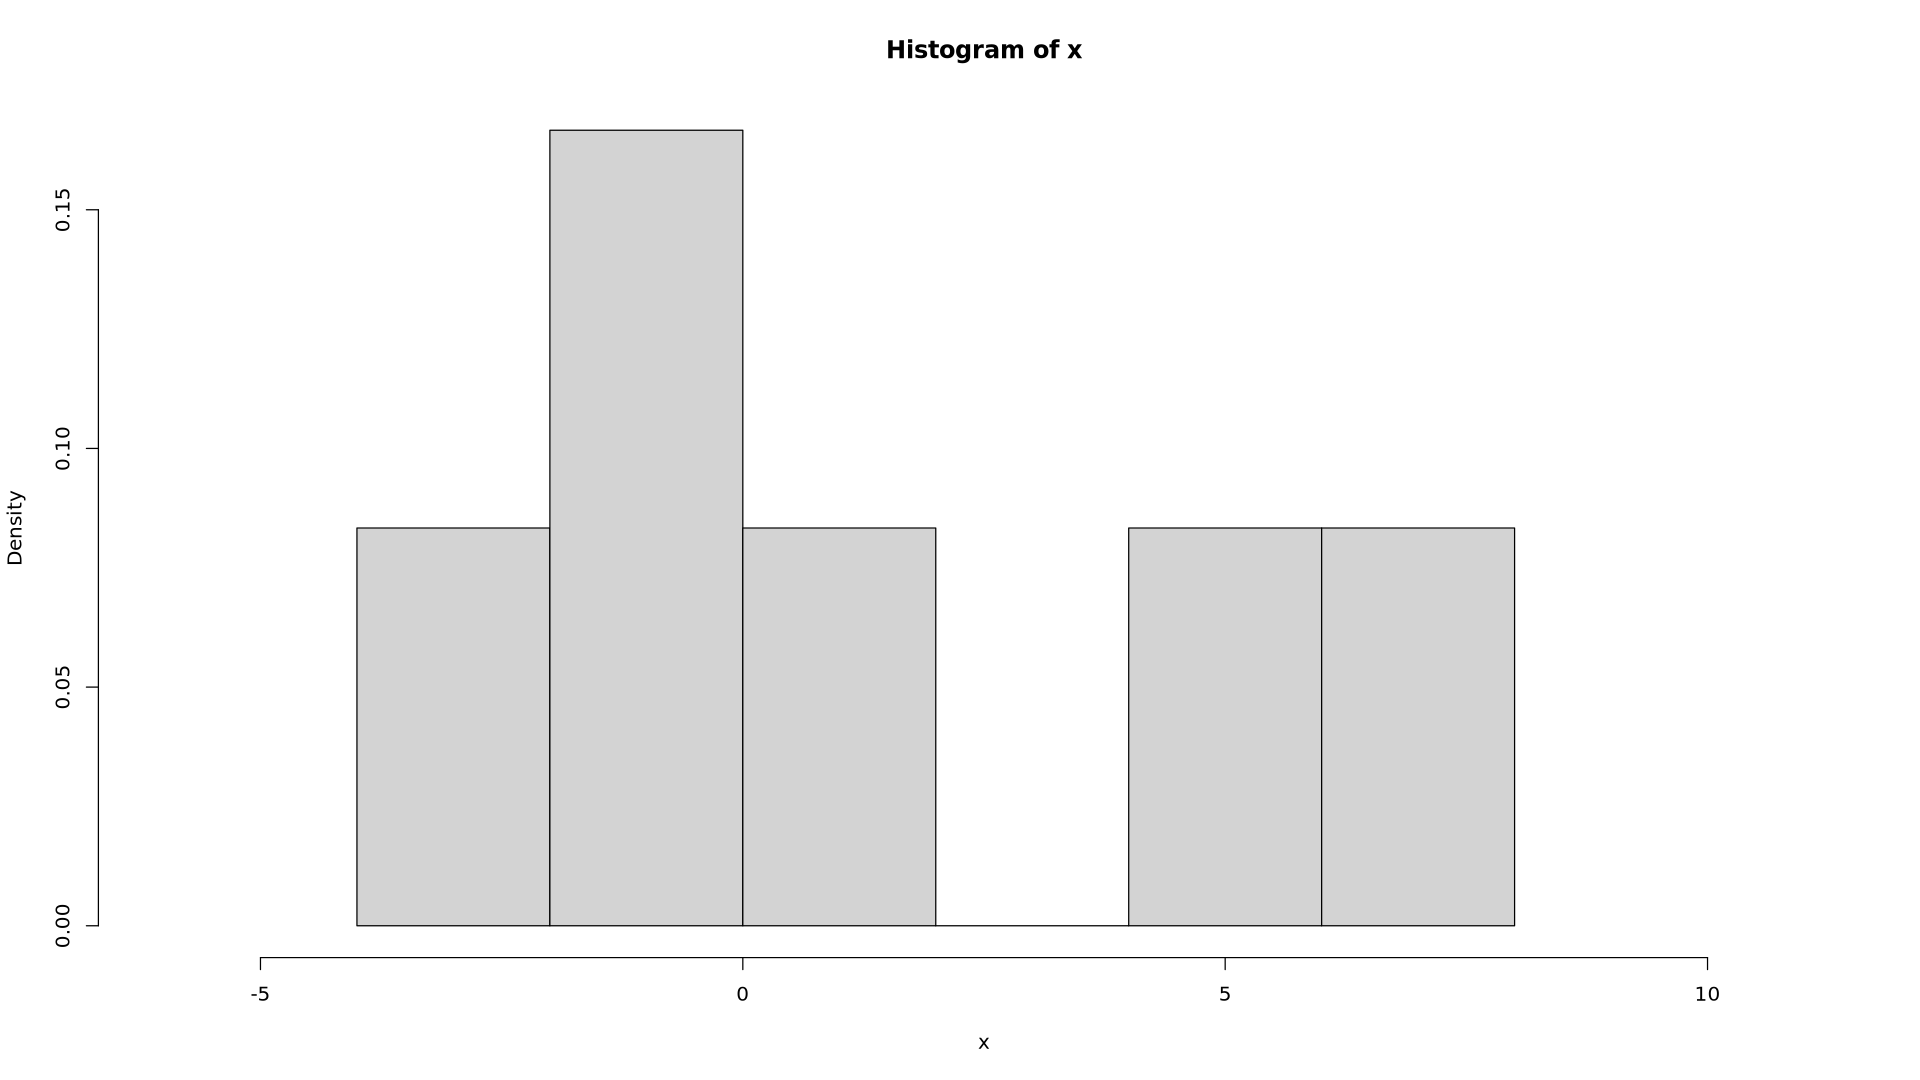

In [11]:
## histogram
x = c(-2.1, -1.3, -0.4, 1.9, 5.1, 6.2)
hist(x, probability = TRUE, xlim = c(-6, 11))  ## h = 2

In [23]:
## kernel
b = 0.9*min(sd(x), IQR(x)/1.35)*length(x)^(-1/5)
b

[1] 2.171331

> 표본표준편차와 IQR을 구하여 b를 산출한 뒤, 각 커널 함수를 구하여 합하면 된다.

The following objects are masked from geyser (pos = 3):

    duration, waiting




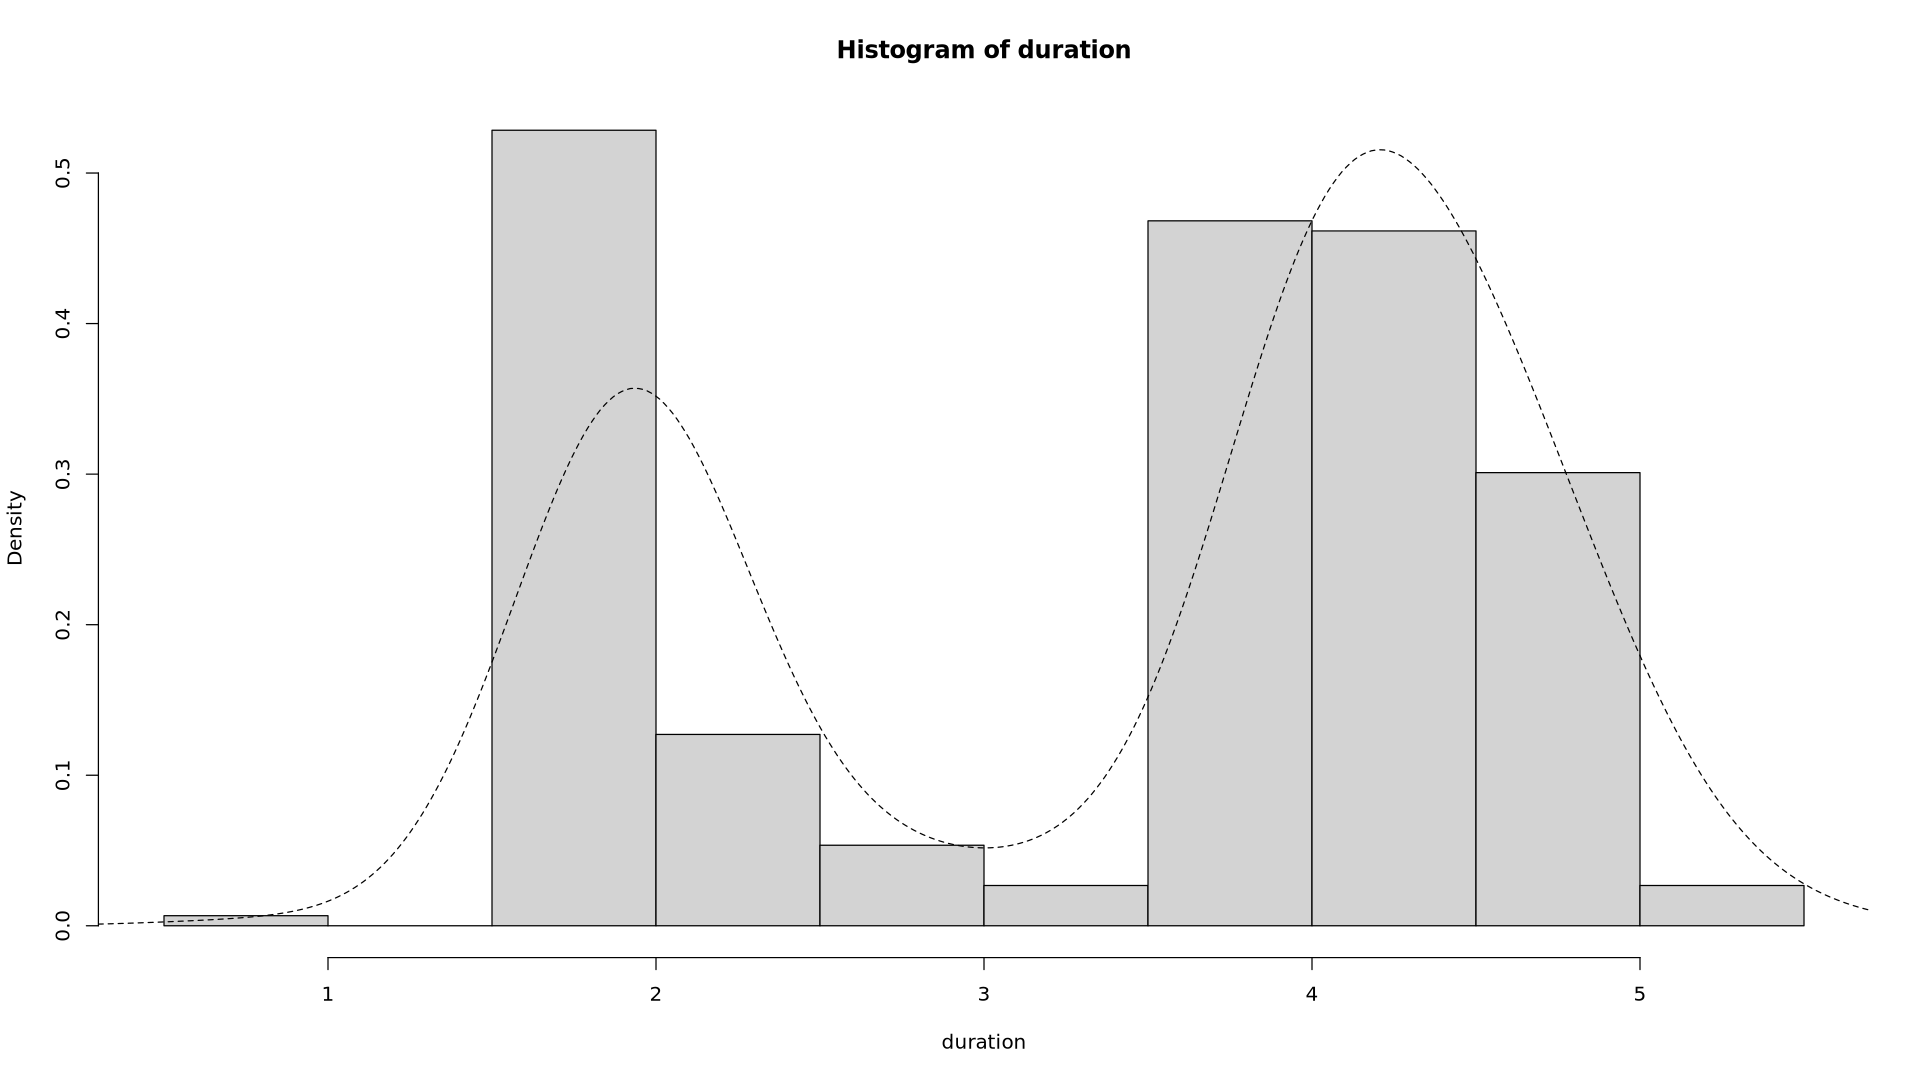

In [26]:
library(MASS)
data(geyser)
attach(geyser)

hist(duration, freq = F)
lines(density(duration), lty = 2)  ## density()로 커널 밀도 추정

`-` 등고선 그림과 전망도

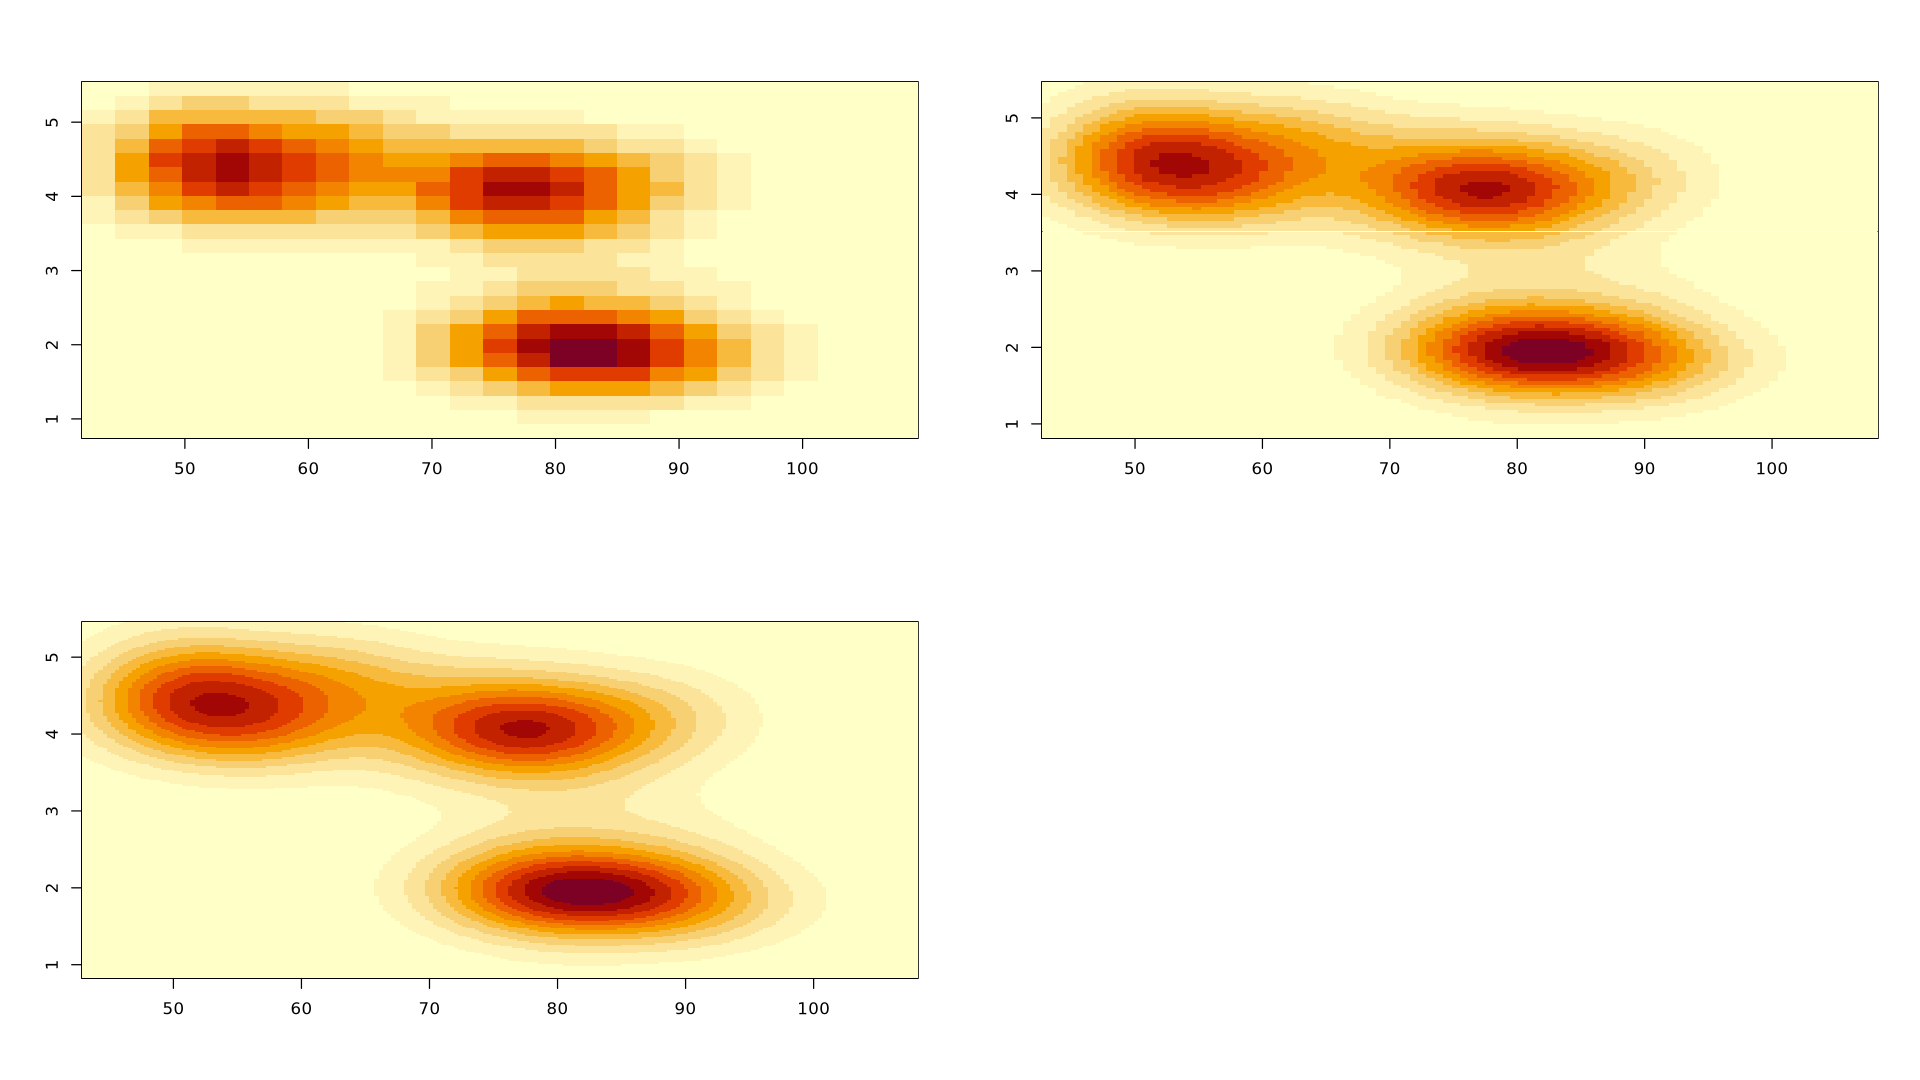

In [33]:
par(mfrow = c(2,2))

density1 = kde2d(waiting, duration, n = 25)
density2 = kde2d(waiting, duration, n = 100)
density3 = kde2d(waiting, duration, n = 200)

image(density1)
image(density2)
image(density3)

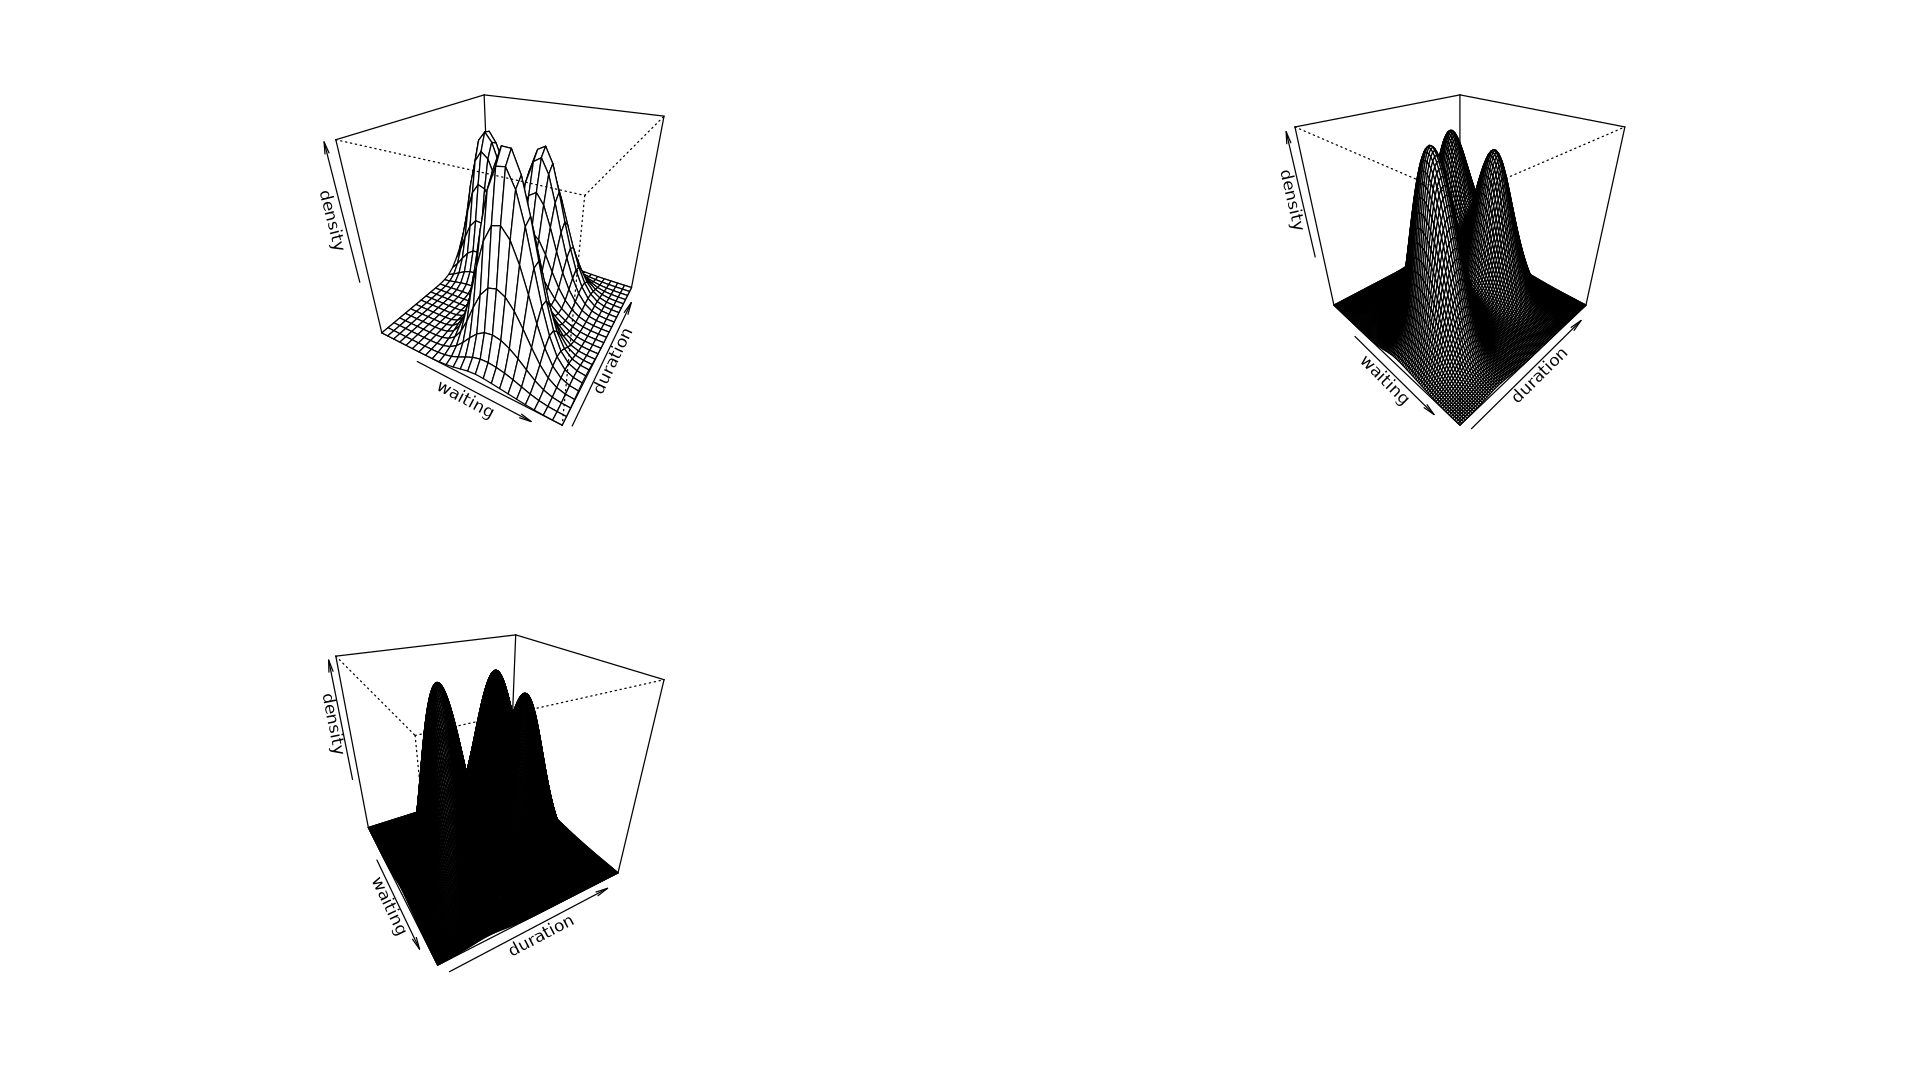

In [43]:
par(mfrow = c(2,2))
persp(density1, phi = 30, theta = 30, xlab = "waiting", ylab = "duration", zlab = "density")  ## phi : vision angle
persp(density2, phi = 30, theta = 45, xlab = "waiting", ylab = "duration", zlab = "density")  ## theta : rotation angle
persp(density3, phi = 30, theta = 60, xlab = "waiting", ylab = "duration", zlab = "density")

`-` 보자기 플롯(bag plot) : 일종의 이차원 상자 그림

> 이변량 자료의 상자 그림.

In [44]:
library(aplpack)

Warning message:
“no DISPLAY variable so Tk is not available”


In [48]:
library(rpart)
data(car.test.frame)
attach(car.test.frame)

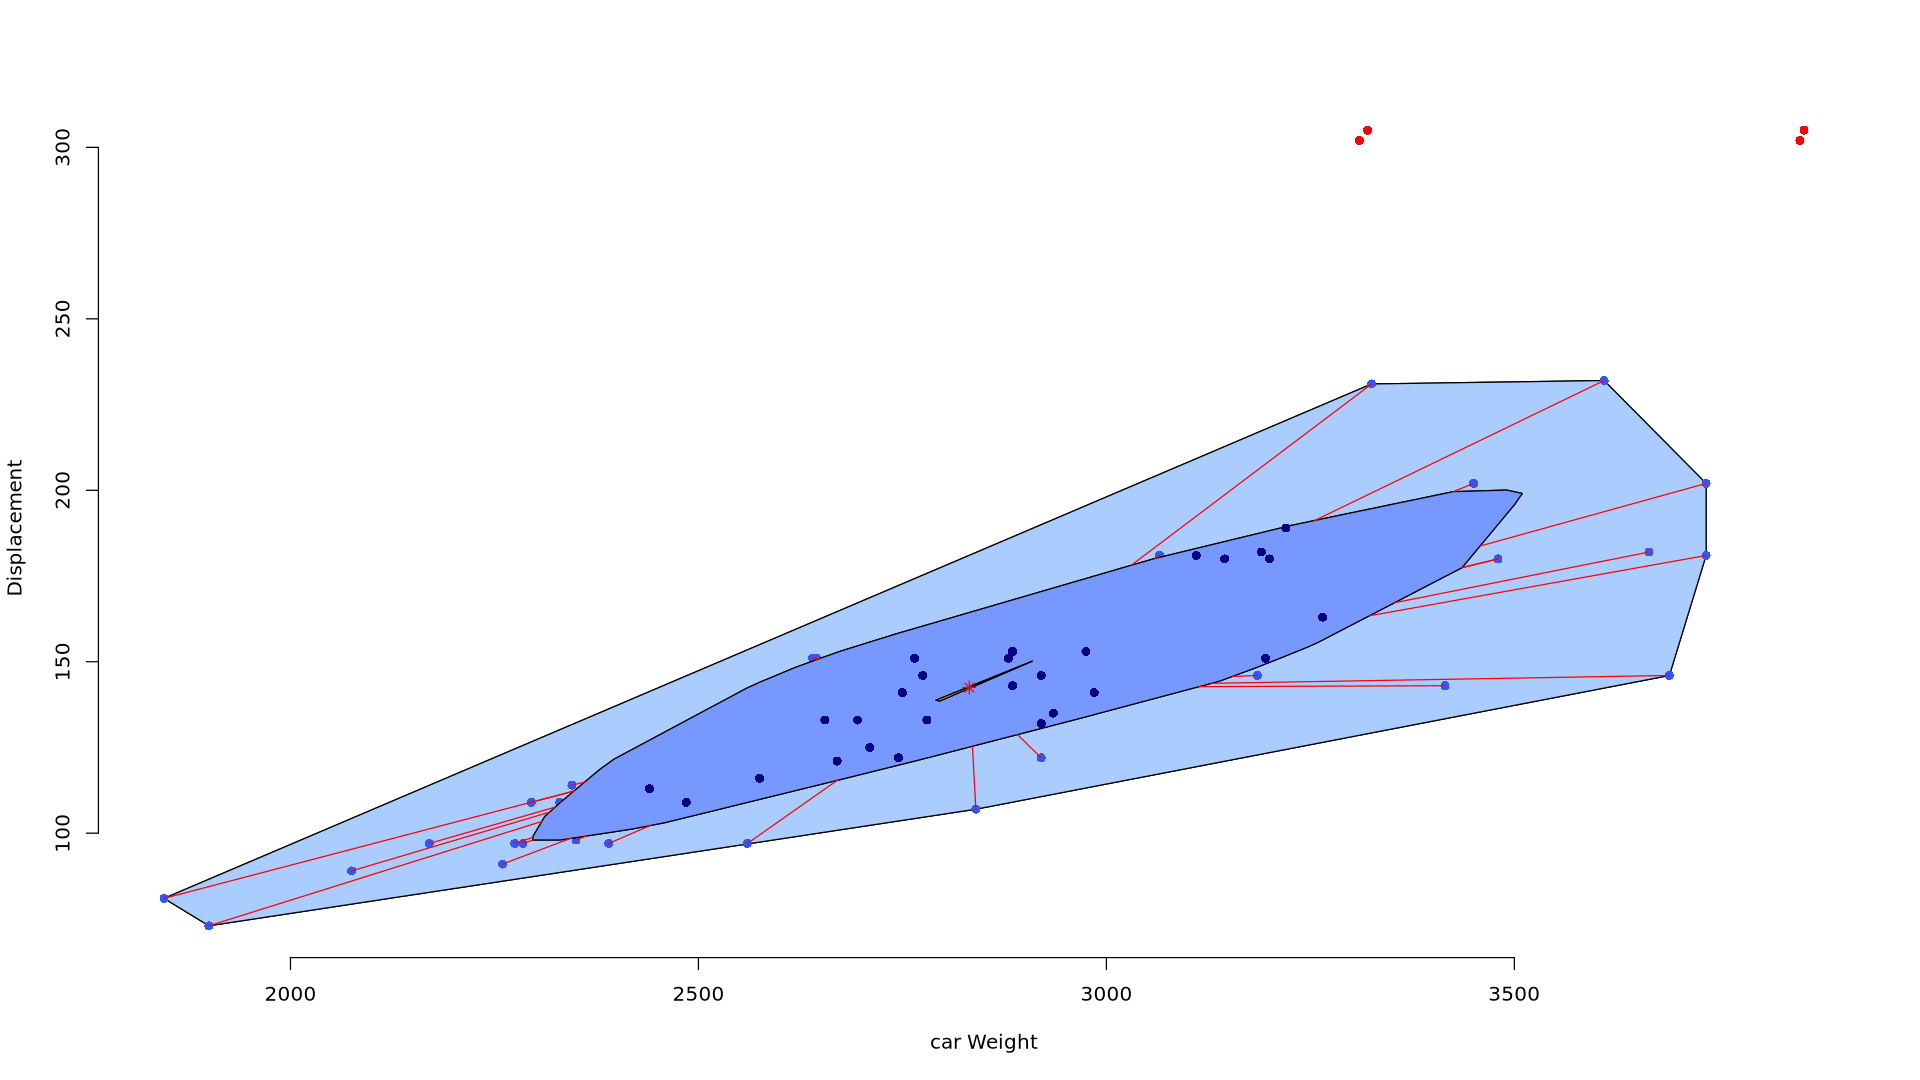

In [51]:
bagplot(x = Weight, y = Disp., show.whiskers = T, cex = 1,
       xlab = "car Weight", ylab = "Displacement")

## show.whiskers : 중앙점과 각 개체 연결

* 알 수 있는 내용

1) 위치(Tukey median)
2) 산포(Size of the bag)
3) 상관(Orientation of the bag)
4) 왜도(수염과 보자기의 모양)
5) 꼬리(긴 수염과 이상치)
6) 이상점(outliers)

`-` 조각 별 선형회귀(stepwise linear regression) : 구간별 회귀

In [54]:
library(MASS)
data(Cars93)
attach(Cars93)

The following objects are masked from car.test.frame:

    Price, Type, Weight




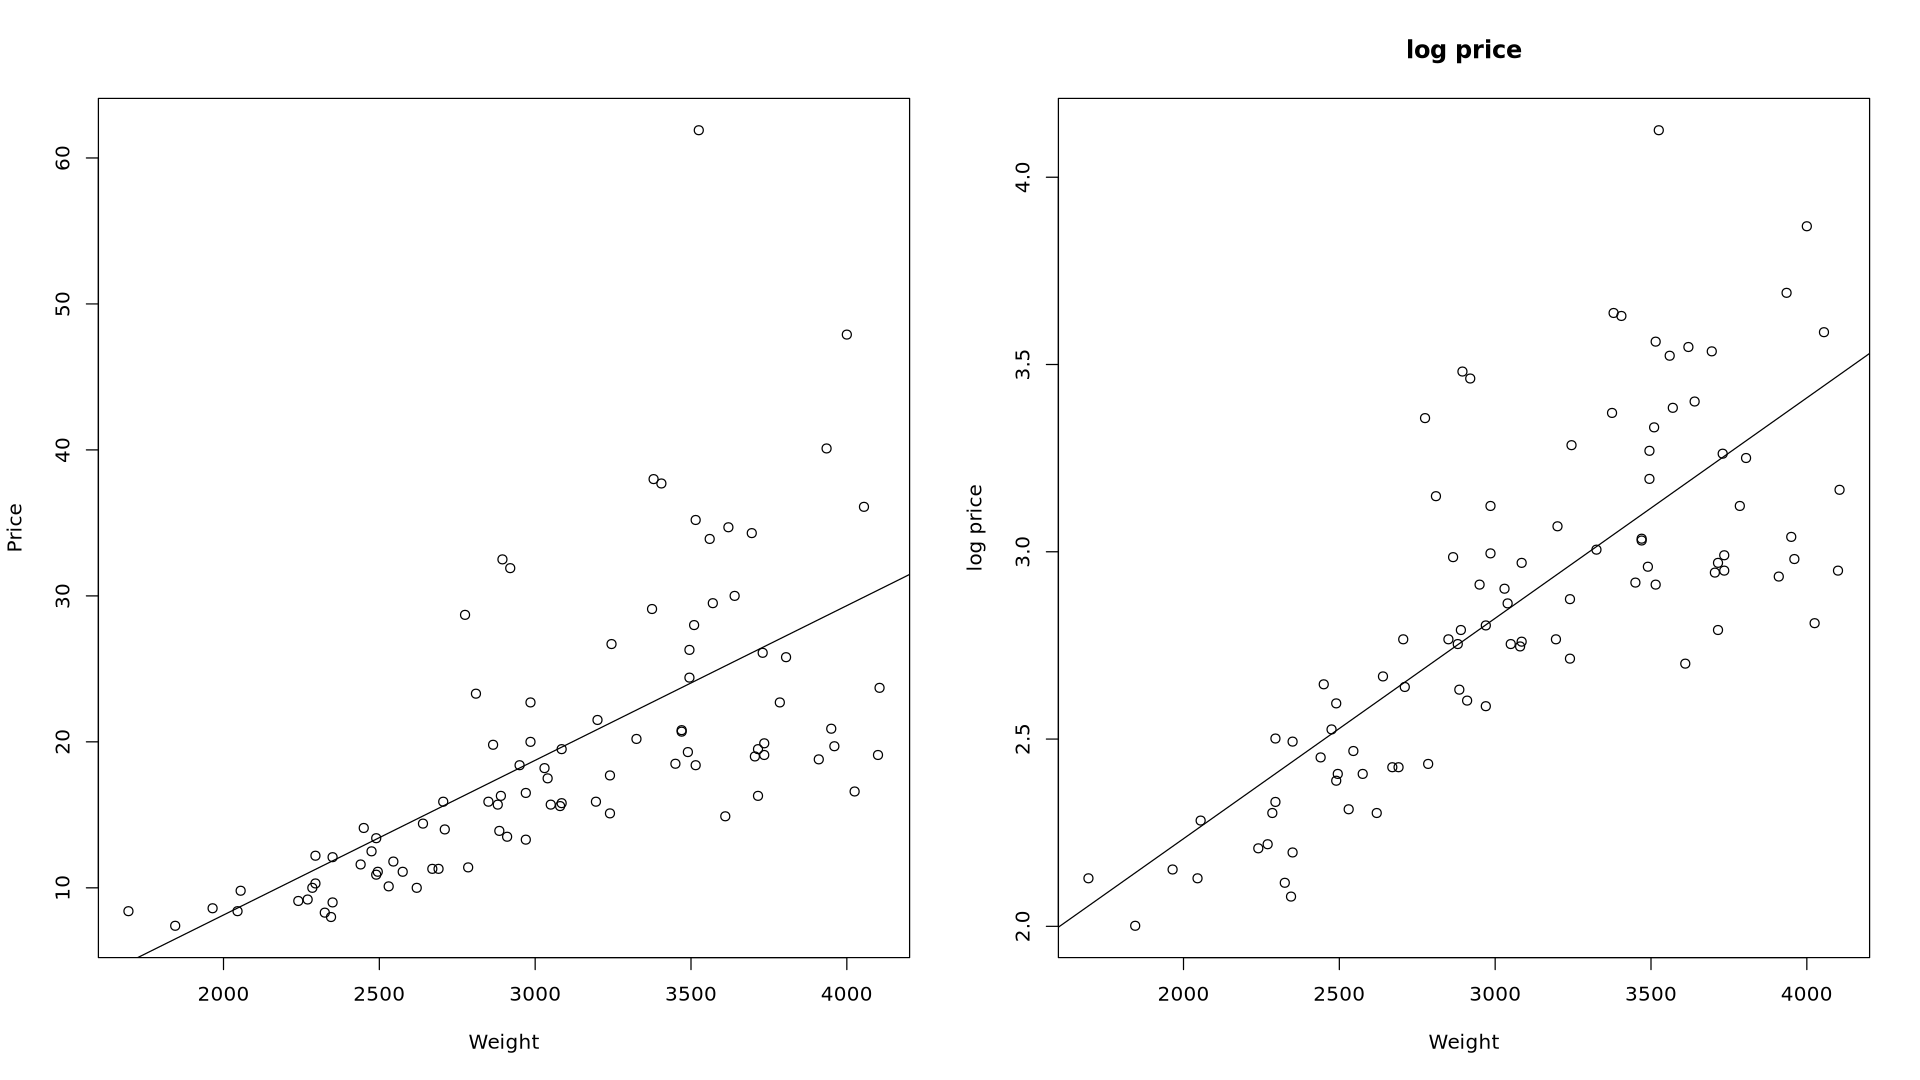

In [58]:
par(mfcol = c(1, 2))
plot(Price~Weight)
lm1 = lm(Price~Weight)
abline(lm1)

log_Prices = log(Price)
plot(log_Prices~Weight, main = "log price", ylab = "log price")
lm2 = lm(log_Prices~Weight)
abline(lm2)

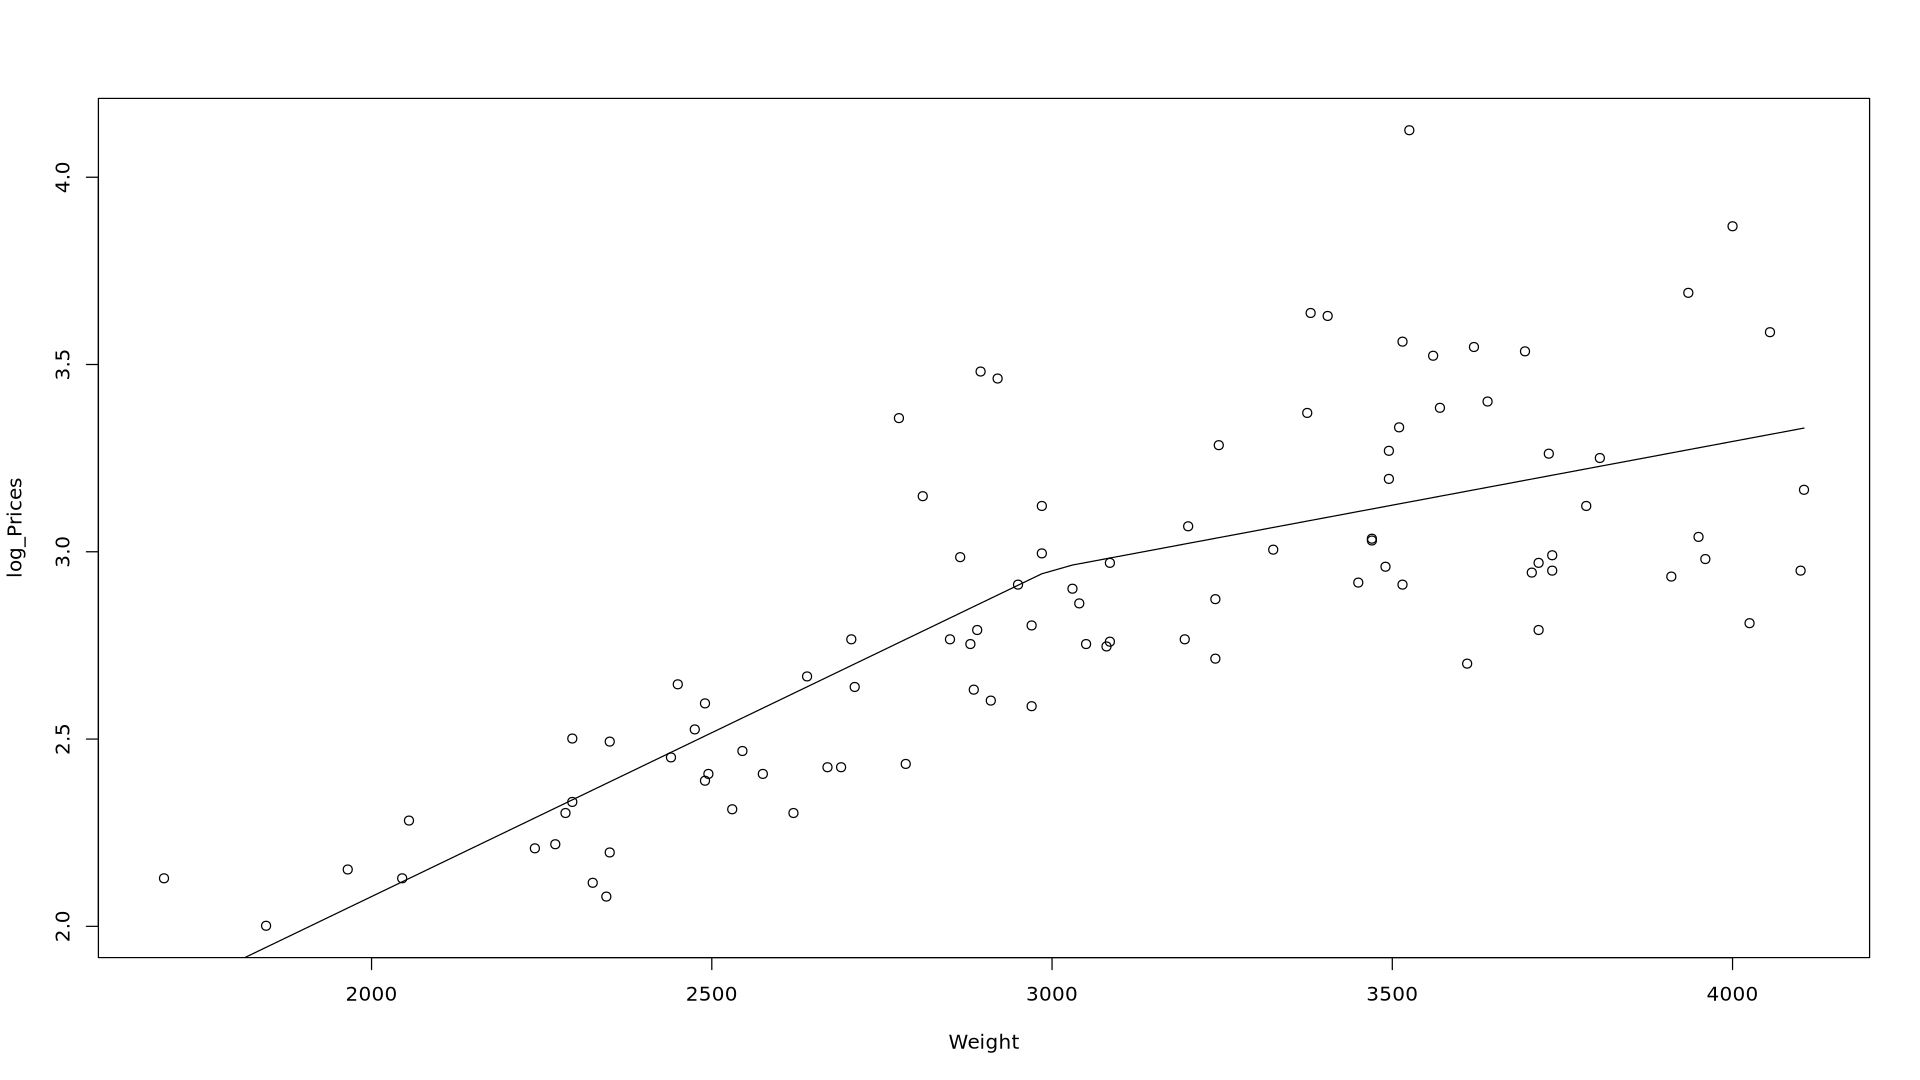

In [72]:
Weight3000 = ((Weight - 3000) + abs(Weight - 3000))/2  ## 3000이하면 0, 이상이면 넘는만큼
lm3 = lm(log(Price)~Weight+Weight3000)
plot(log_Prices~Weight)
lines(lm3$fit[order(Weight)]~sort(Weight))

`-` 산점도 평활기 LOWESS(방법을 알아야 하는 건 아닌듯.)

* 윈도우와 가중최소제곱 방법 이용

1) $$S = {(x_1, y_1), \cdots, (x_n, y_n)}, ~ x_1 ≤ \cdots ≤ x_n$$

    $i^{th}$ 윈도우 : $S_i = {(x_{i-k}, y_{i-k}), \cdots, (x_i, y_i), \cdots, (x_{i+k, y_{i+k}})}$

2) $(x_i, y_i)$에 가장 큰 가중치를 주고, 멀어질수록 작은 가중치를 줌.

3) $x = x_i$에서의 적합값 $\hat y_i$ : 가중 선형회귀

4) LOWESS 적합점

In [ ]:
lowess(y~x, f)  ## f : 평활기 넓이. default = 2/3. 1/3에서 2/3을 잡으면 완만한 평활 곡선을 얻을 수 있음.

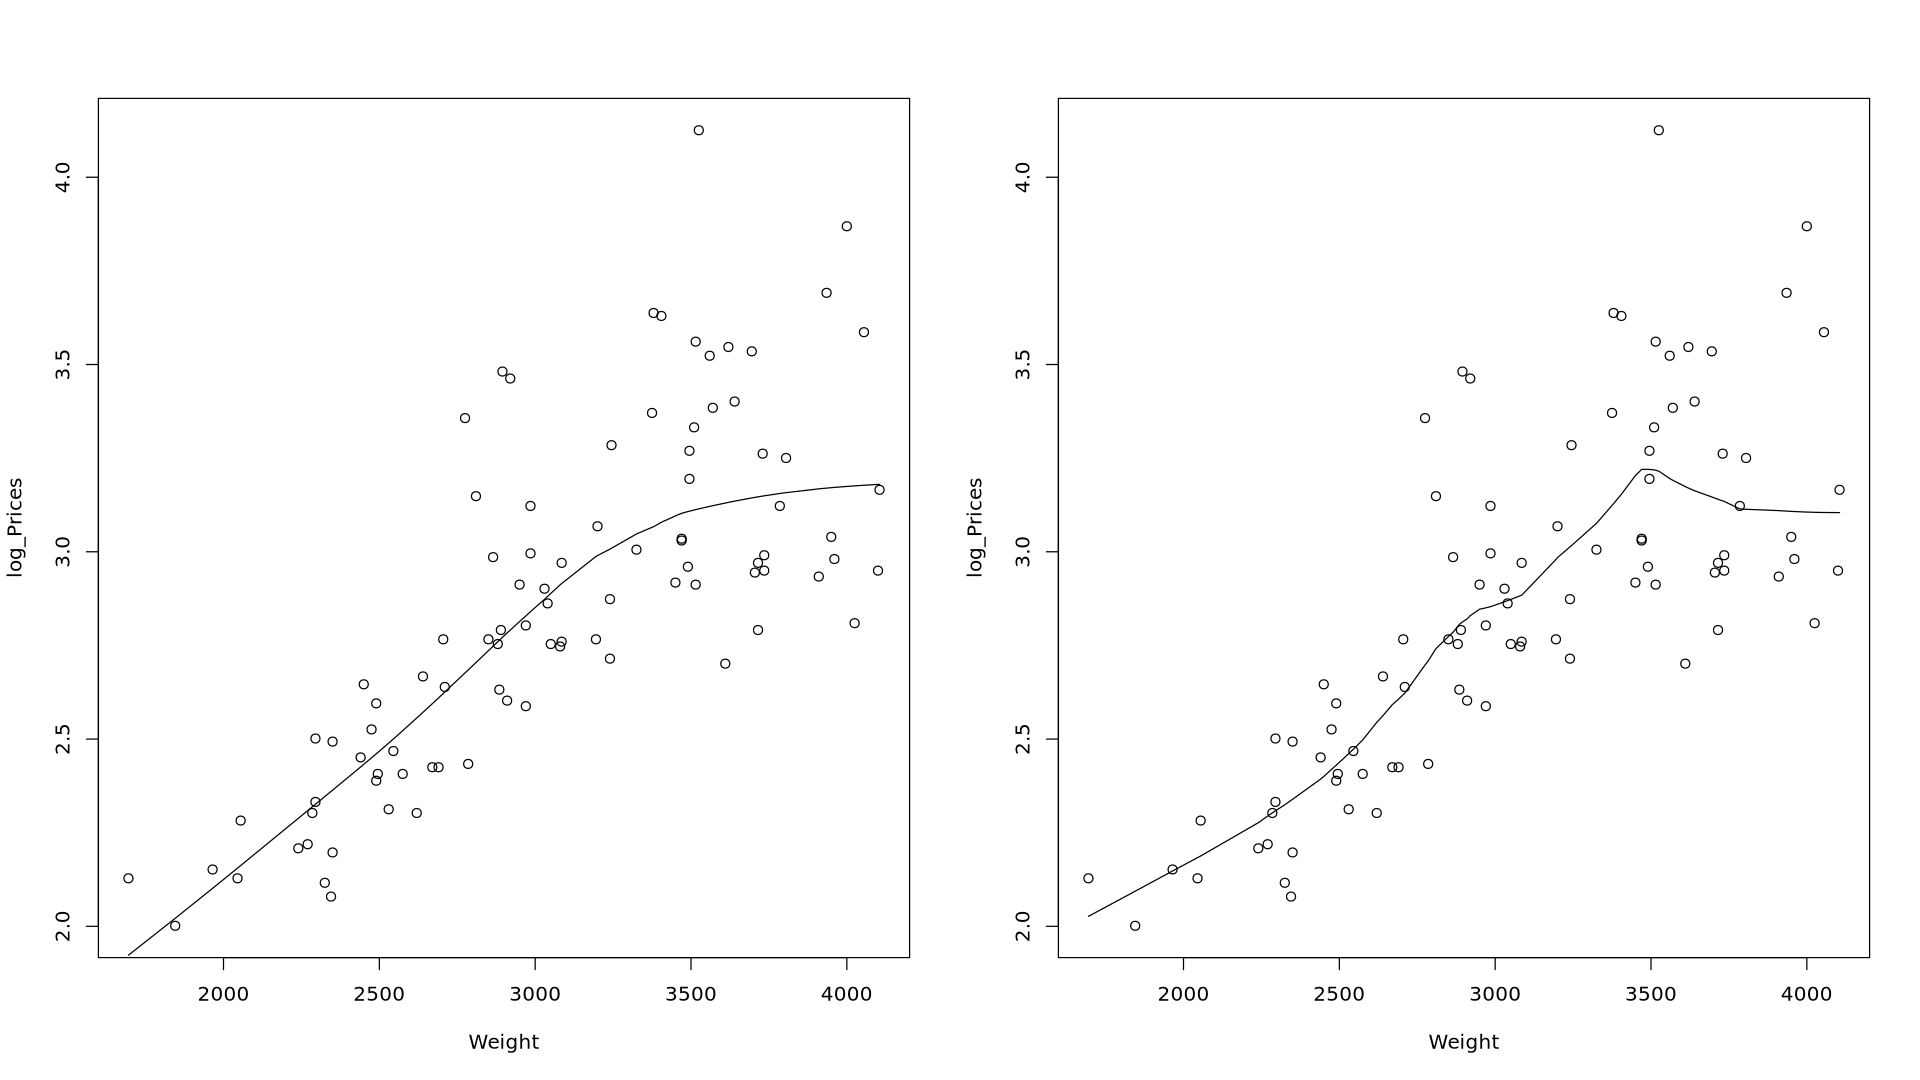

In [69]:
par(mfrow = c(1, 2))
log_Prices = log(Price)
s1 = lowess(log_Prices~Weight)
plot(log_Prices~Weight)
lines(s1)

s2 = lowess(log_Prices~Weight, f = 1/3)
plot(log_Prices~Weight)
lines(s2)

> 평활 자체는 `s1`이 더 잘 됨. 평활기의 넓이가 더 크니까 당연함.